In [1]:
#import the right libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


Again we imported the right libraries for making this script. Don't worry if you forgot one, adding them can be done in the script. In this excercise we will look the boston house data set, this dataset is (again) a very famous (and old) practice dataset. 

The first step is to load the datasets into the script via sklearn.datasets and assign it to a variable.

In [2]:
#Load data from example datasets SK learn
from sklearn.datasets import load_boston
loaddata = load_boston()

Lets take closer look at the data set and view what is in the dataset

In [3]:
#how does the data look like
print(loaddata['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

-------------------------------------------------------------------------------------------------------------------------------

Load all the data into dataframe and call it:  dfdata. Next we will look at the first 5 lines of data.
As you can see I added the target variable (Y) to the dataframe.

In [4]:
#Dataframes are great for organizing your data.
#load all data into a dataframe
dfdata = pd.DataFrame(data=loaddata['data'],columns=loaddata['feature_names'])
dfdata['target']=loaddata['target']
dfdata.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


As you can see the scale of the data has quite some variability. Some algorithms can't cope with this very well, others can. 
Another strange thing is the variable B, this stands for the proportion of black by town. This totally unappropriate and discriminating feature to have in your dataset. In general I find it strange that SK learn even has this available. Then again it shows that there are datasets that have these variables. Pay attention because normally these variables are not called 'proportion of blacks', the come in disguise (often without people knowing). We are going to remove this variable from the dataset immediately.

In [5]:
#Variable B is the 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
#This doesn't seem to be a variable that I want in my data -> drop it
dfdata = dfdata.drop(['B'],axis = 1)

After viewing the first 5 rows of my dataframe its time to get a more detailed view of the trainingset. Pandas has very good function called: describe. It gives you all the important descriptive measures in one overview.

In [6]:
#Pandas has a really great function called describe.
dfdata.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


We already concluded that the scales of these variables differ, in this view you can clearly see it. The variable CHAS seems to be a binary variable (0 or 1). The variable ZN also shows something strang, only at the 75% percentile there are positive values. Lets first have a quick view of the ZN column to see if there is something wrong.

In [7]:
#ZN looks strange, with a minimum value of 0, and a 50% percentile of zero.
#Let's investigate:

dfdata[['ZN','target']].head(15)


,ZN,target
0,18.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
5,0.0,28.7
6,12.5,22.9
7,12.5,27.1
8,12.5,16.5
9,12.5,18.9


There are indeed quite some zero's in this column, it isn't really clear why this is the case.
It could be that there are really no land zones lots, but we need to investigate further.

As you may notice its really difficult to conclude something when only looking at the numbers.
Its far easier to check your data with the help of visualisation. This is called EDA, exploratory data analysis.
It is arguably the most important step in any data science project. We will again use pairplots to investigate the data more closely.

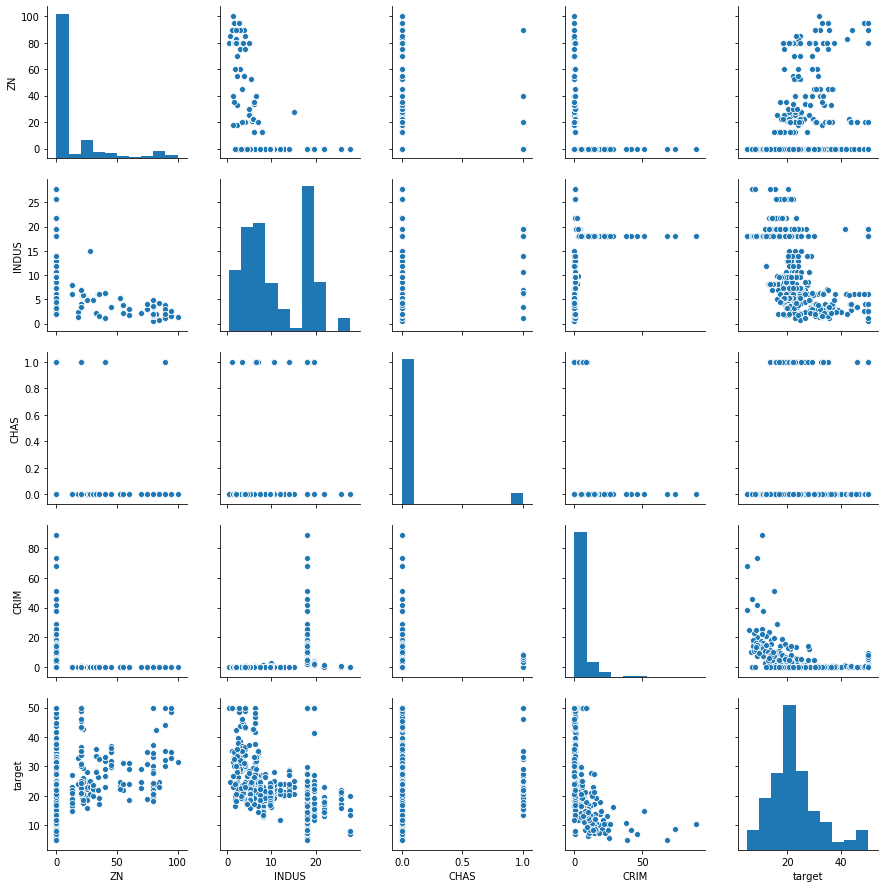

In [8]:
#Time for some further Exploratory Data Analysis
#Lets do some pairplots

sns.pairplot(dfdata[["ZN","INDUS","CHAS","CRIM","target"]],hue = None)

Some findings:

#ZN:    Again it seems that ZN has a lot of values that are zero, but further there is really no relationship with price.
#INDUS: It seems that there is some relation here, more industry means lower prices.
#CHAS:  Close to the river doesn't really seem to have an effect on price.
#CRIM:  Crime rates are low in many cases with exception of a few outliers, but we see some relation with price.

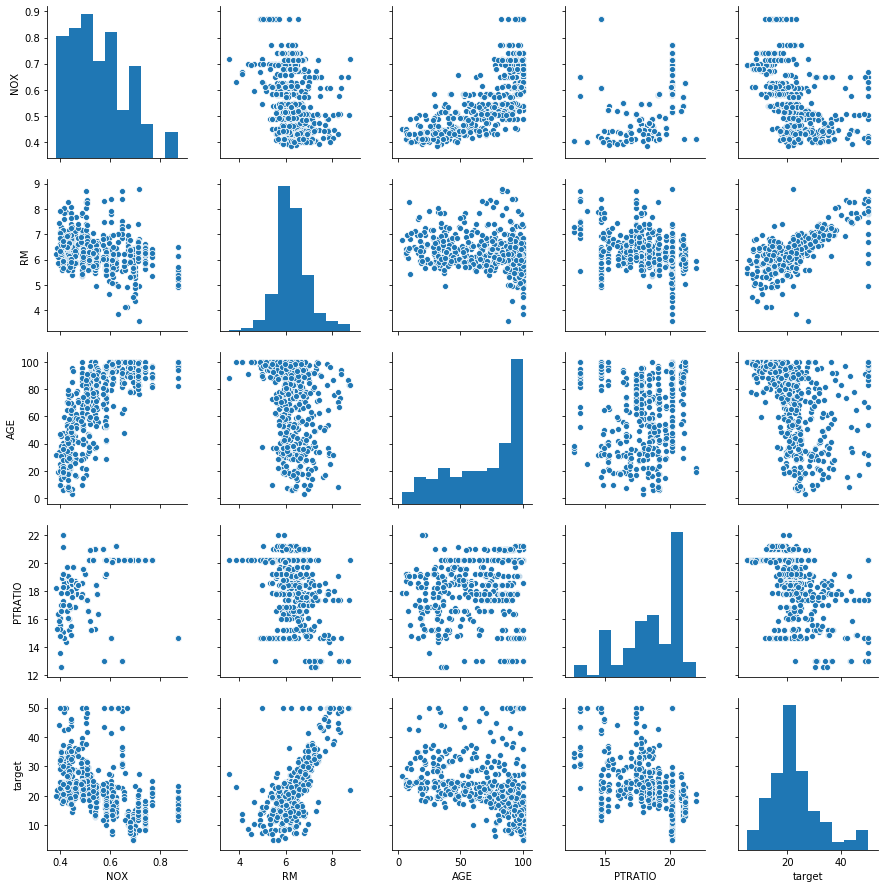

In [9]:
#Time for some Exploratory Data Analysis
#Lets do some pairplots
#classes are in three colors and have different symbols 
#as you see this is a bit much...
sns.pairplot(dfdata[["NOX","RM","AGE","PTRATIO","target"]],hue = None)

Some findings:

NOX: nitric oxides concentration seems to have somewhat a relation with price.

RM: the average number rooms seems give us a nice linear relationship.

AGE: not really a clear relationship here.

PTRATIO: also here not a very clear relationship.

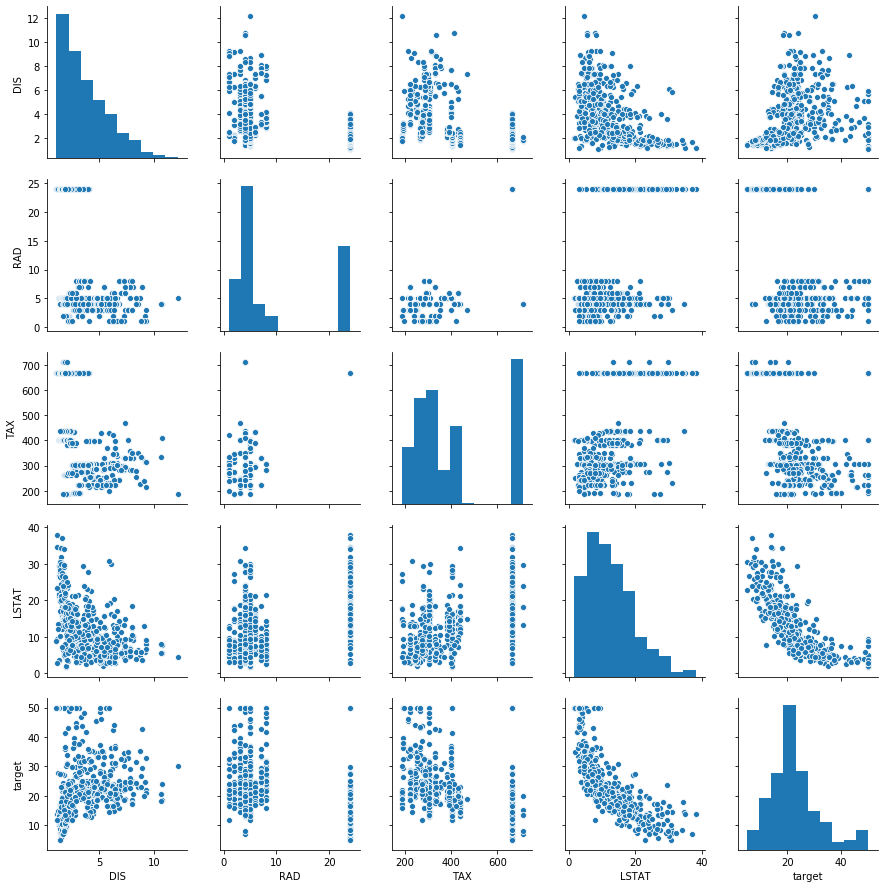

In [10]:
#Time for some Exploratory Data Analysis
#Lets do some pairplots
#classes are in three colors and have different symbols 
#as you see this is a bit much...
sns.pairplot(dfdata[["DIS","RAD","TAX","LSTAT","target"]],hue = None)

Some findings:

DIS: the distance to employment centers doesn't show a very clear relationship

RAD: acces to highway also doesn't show a clear relationship. What is interesting here is the values > 20, what is that?

TAX: TAX also doesn't show any relationship. What is interesting is the values > 600, what is this?

LSTAT: This shows a very clear negative relationship.

------------------------------------------------------------------------------------------------------------------------------- 

Conclusion: It seems to be that we have some questions we want to answer:

zero values of ZN

values > 20 for RAD

values > 600 for TAX

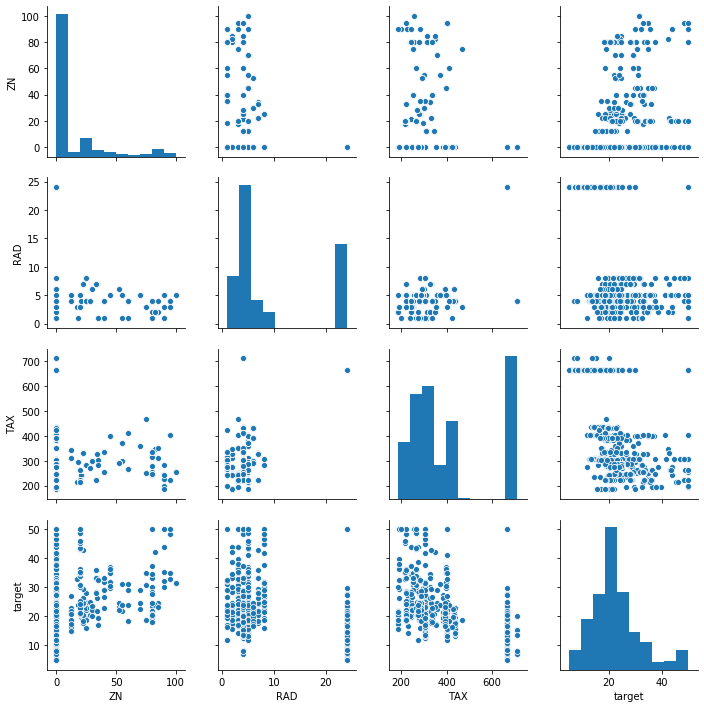

In [11]:
sns.pairplot(dfdata[["ZN","RAD","TAX","target"]],hue = None)

ZN: After further investigation I would conclude that the ZN values are not necessary something to worry about. It could be that the amount of proportion of residential land zoned for lots over 25,000 sq.ft is just zero. 

RAD: For the RAD variable I think some houses just are further away than others, you see the same effect with distance.
I think there is an area where people don't live at all (water, nature parc, forrest etc).

TAX: This is something I can't get my head around, I would expect that TAX and target would correlate. 

Important: After any analysis you will have a lot of questions for the project owner. You can't do data science by only looking at your screen. In this case I will proceed but in the case of a real project I would stop until I had the answers I was looking for.

-------------------------------------------------------------------------------------------------------------------------------

A logical next step in the analysis would be determining the importances of the features.
There are many ways to do this but I would always first opt for a correlation plot/analysis.

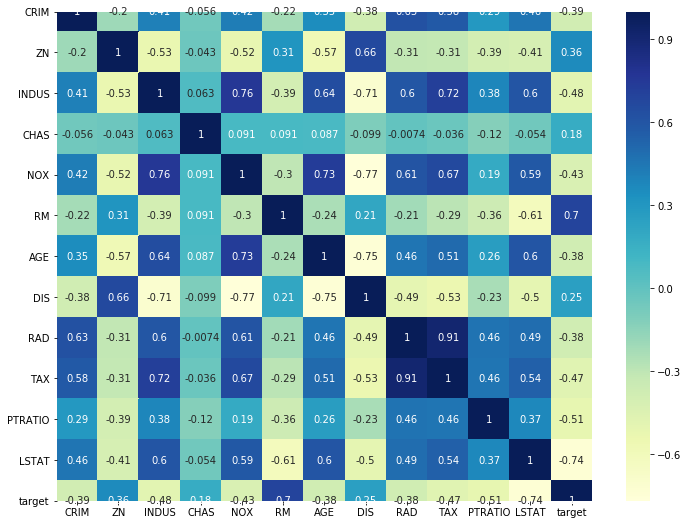

In [12]:
#lets investigate if there are meaningfull correlations
plt.figure(figsize=(12, 9))
corr = dfdata[dfdata.columns].corr()
sns.heatmap(corr, cmap="YlGnBu", annot = True)

Findings:

The correlation matrix shows us two high correlation variables with target (>70%): -LSTAT, +RM

The correlation matrix shows us eight medium correlations: -CRIM, +ZN, -INDUS, -NOX, -AGE, -RAD, -TAX, -PTRATIO

What does this mean in one sentence:

'''Houses which are in area's with lower crime rates, further from industry, 
with lower NOX levels, that are newer, are closer to highways, with higher pupil to teacher ratio, 
in area's with a larger percentage of the population in higher income scales and have more rooms, 
are generally more expensive'''

That seems quite logical I think.


-------------------------------------------------------------------------------------------------------------------------------

Now its time to divide the dataframe into a dataframe for the X variables and the Y variable

In [13]:
#Make the data suitable for the models, lets call this new matrix DFFEAT.
#We will remove the the Y's in the data (the answers).
#This means that the answers in this maxtrix are your X's or independent variables

dffeat = dfdata.copy() #copy the dataframe from dfdata to dffeat
dffeat = dffeat.drop(['target'],axis=1) #remove the Y's
dffeat.head(5) #lets see the first of 5 rows

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [14]:
#In the previous code we made the X's ready for the algorithms, now its time to make the Y's ready

dftarget = dfdata.copy() #copy the dataframe from dfdata
dftarget = dftarget.loc[:, ['target']]
dftarget.head(5)

,target
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [15]:
#Make an Y & X
yl =  dftarget[['target']].values.ravel()
Xl =  dffeat

-------------------------------------------------------------------------------------------------------------------------------

Two dataframes are created so its time spilt the dataframes into training and test sets. Then we will import the first model we are going to use: linear Regression. After that we will fit the model on the data and request a prediction on the test set. The results of the prediction is shown in a bar chart. Finally we will calculate the MSE, MAE, RMSE and R2.

In [16]:
from sklearn.model_selection import train_test_split

#test_size =0.3, this is the split between the trainings data (70%) and the test data (30%)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(Xl, yl, test_size=0.20)

In [17]:
X_train_l.shape

(404, 12)

In [18]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_l, y_train_l)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
prediction_l = lm.predict(X_test_l)

df1l = pd.DataFrame({'Actual':y_test_l, 'Predicted': prediction_l})
df2l = df1l.head(20)

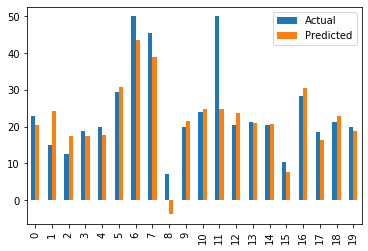

In [20]:
df2l.plot(kind = 'bar')

In [21]:
print('MSE:', metrics.mean_squared_error(y_test_l, prediction_l).round(2))
print('MAE:', metrics.mean_absolute_error(y_test_l, prediction_l).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_l, prediction_l)).round(2))
print('R squared error:', r2_score(y_test_l, prediction_l).round(1) * 100,'%')

MSE: 24.16
MAE: 3.39
RMSE: 4.91
R squared error: 70.0 %


Conclusion: The linear model didn't preform wel when looking at the scores. This was expected because the pairplots didn't show very clear linear relationships. When looking at the bar chart above its clear that the model is quite far of the truth.



-------------------------------------------------------------------------------------------------------------------------------

Its obvious that a simple linear regression isn't good enough to predict the house prices. So lets go back to the features that are most correlated with the house prices.

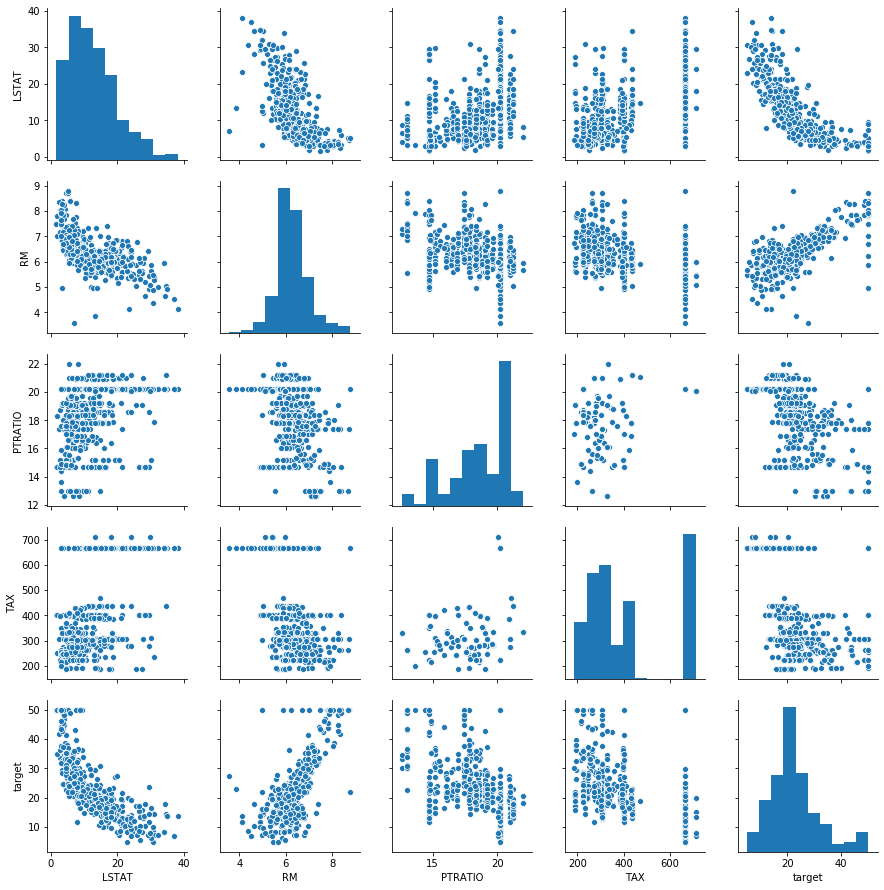

In [22]:
sns.pairplot(dfdata[["LSTAT","RM","PTRATIO","TAX","target"]],hue = None)

The LSTAT variable shows a non linear negative correlation. The RM variable a linear positive correlation. The other two variables show not a very clear pattern. We can try to fit a non linear regression on the data, this is called polynomial regression. 

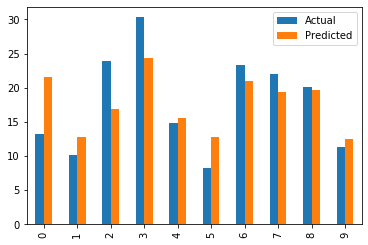

In [33]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#rename the Y & X arrays 
yp =  dftarget[['target']].values.ravel()
Xp =  dffeat

#test_size =0.3, this is the split between the trainings data (70%) and the test data (30%)
X_trainp, X_testp, y_trainp, y_testp = train_test_split(Xp, yp, test_size=0.30)

#Instantiate the polynomialfeatures with a degree of 2
p_features = PolynomialFeatures(degree=2)

#Transform into a polynomial array for X_train
X_trainpoly = p_features.fit_transform(X_trainp)

#fit the linear regression
p_model = LinearRegression()
p_model.fit(X_trainpoly, y_trainp)

#test what is the result
prediction_p = p_model.predict(p_features.fit_transform(X_testp))

#visualize the result
df1p = pd.DataFrame({'Actual':y_testp, 'Predicted': prediction_p})
df2p = df1p.head(10)

df2p.plot(kind = 'bar')

In [32]:
print('MSE:', metrics.mean_squared_error(y_testp, prediction_p).round(2))
print('MAE:', metrics.mean_absolute_error(y_testp, prediction_p).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testp, prediction_p)).round(2))
print('R squared error:', r2_score(y_testp, prediction_p).round(2) * 100, '%')

MSE: 10678895.02
MAE: 941.68
RMSE: 3267.86
R squared error: -13302004.999999998 %


Conclusion: It seems that polynomial regression produces a higher score in R2 and lower scores on MSE, MAE, RMSE. Altough an improvement I think its worthwile to try some other models.

-------------------------------------------------------------------------------------------------------------------------------

Some machine learning algorithms can do both classification and regression. Sometimes they are also called CART methods.
The two I want to use are the decision tree regressor and the Random Forrest regressor.

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

#rename the Y & X arrays for decision tree regression
yt =  dftarget[['target']].values.ravel()
Xt =  dffeat

#test_size =0.3, this is the split between the trainings data (70%) and the test data (30%)
X_traint, X_testt, y_traint, y_testt = train_test_split(Xt, yt, test_size=0.20)

dtr = DecisionTreeRegressor(random_state=120)

dtr.fit(X_traint,y_traint)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=120, splitter='best')

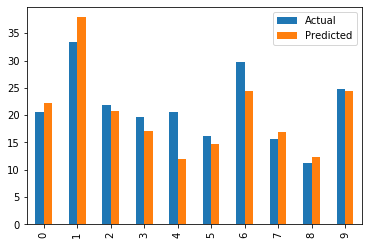

In [26]:
prediction_t = dtr.predict(X_testt)

df1dtr = pd.DataFrame({'Actual':y_testt, 'Predicted': prediction_t})
df2dtr = df1dtr.head(10)
df2dtr.plot(kind = 'bar')

In [27]:
print('MSE:', metrics.mean_squared_error(y_testt, prediction_t).round(2))
print('MAE:', metrics.mean_absolute_error(y_testt, prediction_t).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testt, prediction_t)).round(2))
print('R squared error:', r2_score(y_testt, prediction_t).round(2) * 100,'%')

MSE: 44.25
MAE: 4.06
RMSE: 6.65
R squared error: 59.0 %


-------------------------------------------------------------------------------------------------------------------------------

Now we are going to use a Random Forrest regressor.

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#rename the Y & X arrays for decision tree regression
yrm =  dftarget[['target']].values.ravel()
Xrm =  dffeat

#test_size =0.3, this is the split between the trainings data (70%) and the test data (30%)
X_trainrm, X_testrm, y_trainrm, y_testrm = train_test_split(Xrm, yrm, test_size=0.30)

rm = RandomForestRegressor(random_state=120)

rm.fit(X_trainrm,y_trainrm)

C:\Users\Carlo.van.den.Boom\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=120, verbose=0,
                      warm_start=False)

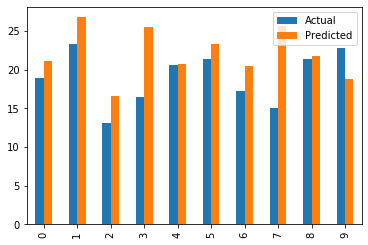

In [29]:
prediction_rm = rm.predict(X_testrm)

df1rm = pd.DataFrame({'Actual':y_testrm, 'Predicted': prediction_rm})
df2rm = df1rm.head(10)
df2rm.plot(kind = 'bar')

In [30]:
print('MSE:', metrics.mean_squared_error(y_testrm, prediction_rm).round(2))
print('MAE:', metrics.mean_absolute_error(y_testrm, prediction_rm).round(2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_testrm, prediction_rm)).round(2))
print('R squared error:', r2_score(y_testrm, prediction_rm).round(2) * 100, '%')

MSE: 14.04
MAE: 2.48
RMSE: 3.75
R squared error: 84.0 %


-------------------------------------------------------------------------------------------------------------------------------